# KNN

#### Boletín 1: evaluación y selección de modelos
#### Boletín 2: métodos basados en vecinos más próximos

Para la realización de las prácticas de esta segunda parte de la materia se utilizará scikit-learn, una
librería de aprendizaje estadístico en Python, a través de Jupyter Notebooks. La ejecución se realizará
en el CESGA siguiendo los pasos indicados en el archivo CESGA.pdf.


**[introduction.ipynb](http://localhost:8888/notebooks/4_seleccion_de_modelos_y_KNN/Introduction.ipynb)**

    En primer lugar, abre mediante ipython notebook el fichero introduction.ipynb, donde se describen algunas de las operaciones básicas necesarias para trabajar con scikit-learn: aprenderás a cargar los datos, realizar operaciones básicas con matrices, y representaciones gráficas.

**[knn.ipynb](http://localhost:8888/notebooks/4_seleccion_de_modelos_y_KNN/KNN.ipynb)**

    A continuación abre el fichero knn.ipynb. En este archivo se realiza la experimentación con un algoritmo sobre un conjunto de datos. Concretamente, se ha escogido el método de vecinos más cercanos, y un archivo con un problema muy simple (toyExample.data). Los pasos que se realizan son los siguientes:
    
    - Carga de datos y preprocesado básico.
    - División del conjunto de datos en entrenamiento y test.
    - Generación de los datos sobre los que se harán las representaciones gráficas.
    - Búsqueda de los mejores valores para los hiper-parámetros mediante validación cruzada.
    - Generación del modelo final, test y representación gráfica.
    - Guardar el modelo aprendido.

### Instrucciones para la experimentación en TODOS los boletines de prácticas

En los diferentes ejercicios que se realizarán durante el curso, existen una serie de operaciones con una componente aleatoria: la división en entrenamiento y test, el aprendizaje de un modelo o incluso, en
algunos casos, el test del modelo. Como norma general de experimentación es interesante asegurar la repetibilidad de los experimentos, eliminando la aleatoriedad, puesto que nos permite depurar errores,
comparar modelos, etc. Además, para la evaluación de los boletines también es imprescindible eliminar esa aleatoriedad.

Para ello vamos a fijar la semilla del generador de números aleatorios, de tal manera que su secuencia sea siempre la misma. La semilla se establece mediante el comando np.random.seed(SEED_VALUE), y
en este boletín utilizaremos un SEED_VALUE=1. Será necesario utilizar este comando inmediatamente antes de cualquier operación con un componente aleatorio. Esto incluye: train_test_split(), fit(),
predict(), etc. En aquellas funciones que lo admitan, sustituiremos el comando np.random.seed(SEED_VALUE) por el argumento random_state=SEED_VALUE.

In [1]:
!python --version

Python 2.7.15 :: Anaconda, Inc.


In [2]:
!python3 --version

/usr/bin/sh: python3: command not found


## Importamos las librerías a utilizar

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import matplotlib

import os
import itertools

In [2]:
%matplotlib inline
matplotlib.style.use('ggplot')
#np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  # Para evitar warnings en algunas gráficas
import warnings

# Filtrar y ocultar todos los warnings
warnings.filterwarnings('ignore')

## Definimos variables globales

In [3]:
DATASET_NAME = './data/Exercice.data'
DATASET_DELIMITER = ','
SEED_VALUE = 1  # NO CAMBIES ESTA SEMILLA, así todos tendremos los mismos resultados

# Ejercicio 1

Dado el siguiente conjunto de datos de clasificación con 6 observaciones, 3 variables de entrada y
una variable de salida:



## Leemos el fichero de datos

In [6]:

if os.path.exists(DATASET_NAME):
    dataset = pd.read_csv(DATASET_NAME, 
                          delimiter=DATASET_DELIMITER,
                          skiprows=0,
                          header=None,
                          names = ["X1", "X2", "X3", "Y"])
else:
    dataset = d.DataFrame(np.array(
    [[0, 3, 2, 1], 
    [3, 0, 3, 0], 
    [0, 3, -1, 0], 
    [3, 0, 0, 1], 
    [1, 2, 1, 1], 
    [2, 1, 0, 0]]), columns=['X1', 'X2', 'X3', 'Y'])
dataset

X1  X2  X3  Y
0   0   3   2  1
1   3   0   3  0
2   0   3  -1  0
3   3   0   0  1
4   1   2   1  1
5   2   1   0  0

El fichero contiene 3 variables y 17 observaciones distintas. Las variables predictoras son `X0` y `X1`, y la variable dependiente sería `Y`. Estamos ante un problema de clasificación binario (dada la naturaleza booleana de `Y`, existen 2 clases).

## Visualizamos los datos

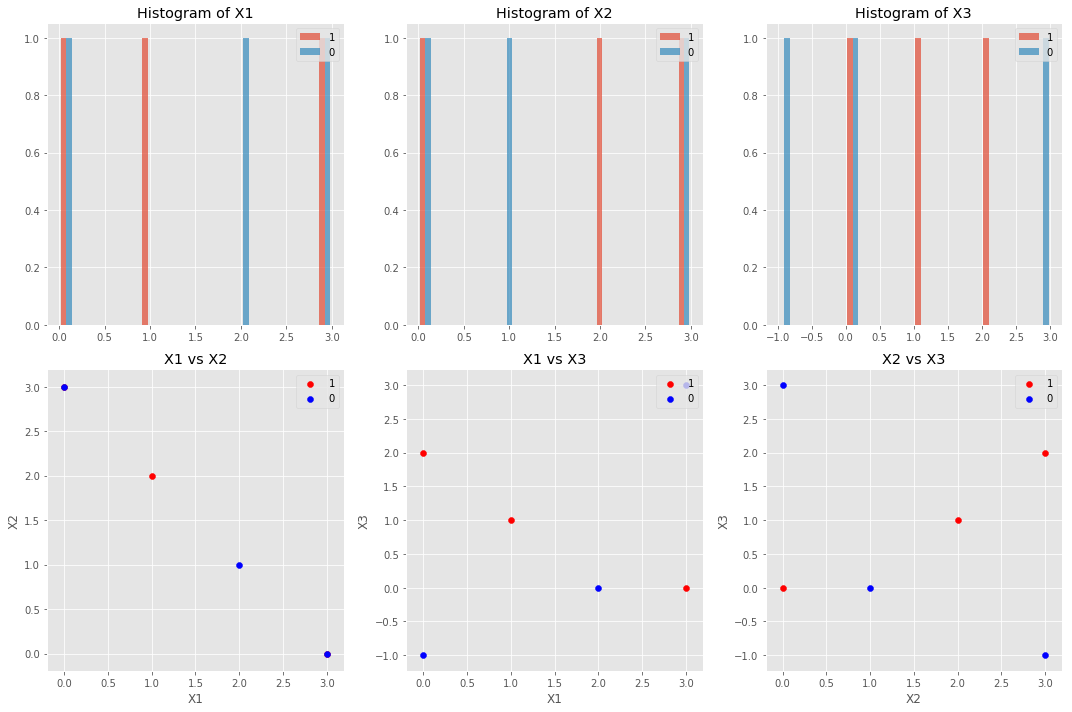

In [7]:

columns = dataset.columns[:-1]  # Exclude the 'Y' column

# Create a 2x3 subplot grid for both histogram and scatter plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Visualize histograms for the first three columns
for i, column in enumerate(columns[:3]):
    axs[0, i].hist([dataset[dataset['Y'] == 1][column], dataset[dataset['Y'] == 0][column]], label=['1', '0'], bins=20, alpha=0.7)
    axs[0, i].set_title("Histogram of {}".format(column))
    axs[0, i].legend(loc='upper right')

# Create combinations of variables for scatter plot comparison
combinations = list(itertools.combinations(columns, 2))

# Visualize scatter plots for the remaining combinations
for j, (var1, var2) in enumerate(combinations):
    k = j + 1  # Start from the second row
    scatter1 = axs[1, j].scatter(dataset[dataset['Y'] == 1][var1], dataset[dataset['Y'] == 1][var2], c='red', label='1')
    scatter0 = axs[1, j].scatter(dataset[dataset['Y'] == 0][var1], dataset[dataset['Y'] == 0][var2], c='blue', label='0')
    axs[1, j].set_title("{} vs {}".format(var1, var2))
    axs[1, j].set_xlabel(var1)
    axs[1, j].set_ylabel(var2)
    axs[1, j].legend(handles=[scatter1, scatter0], loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

Suponiendo que se quiere hacer la predicción de la variable de salida para X1=0, X2=0, X3=0
mediante KNN.

In [8]:
# definimos nuestro punto para la prediccion
point=np.array([0,0,0])

**a)** Computar la distancia entre cada observación y el punto de test.

Usamos la distancia euclidania para este calculo

$$
\text{distances} = \sqrt{\sum_{i=1}^{3} (\text{dataset}[:, i] - \text{point}[i])^2}
$$


In [9]:
# Compute Euclidean distance for each observation
distances = np.sqrt(np.sum((dataset[['X1', 'X2', 'X3']] - point) ** 2, axis=1))
# Create a DataFrame to display the distances
distance_df = pd.DataFrame({
    'Observacion': dataset.apply(lambda row: '({}, {}, {})'.format(row["X1"], row["X2"], row["X3"]), axis=1),
    'Etiqueta_Observacion': dataset['Y'],
    'Punto': dataset.apply(lambda row: '({}, {}, {})'.format(point[0], point[1], point[2]), axis=1),
    'Distancia_Euclidiana': distances
})

# visualizarlo de manera vonita
display(distance_df)

Distancia_Euclidiana  Etiqueta_Observacion Observacion      Punto
0              3.605551                     1   (0, 3, 2)  (0, 0, 0)
1              4.242641                     0   (3, 0, 3)  (0, 0, 0)
2              3.162278                     0  (0, 3, -1)  (0, 0, 0)
3              3.000000                     1   (3, 0, 0)  (0, 0, 0)
4              2.449490                     1   (1, 2, 1)  (0, 0, 0)
5              2.236068                     0   (2, 1, 0)  (0, 0, 0)

**Nota:** este ejercicio debe hacerse sin utilizar ninguna función de scikit-learn. No es necesario
estandarizar las variables.

In [10]:
#Nota: este ejercicio debe hacerse sin utilizar ninguna función de scikit-learn. No es necesario estandarizar las variables
# Creamos nuestra propia función KNeighborsClassifier para no usar scikit-learn

def knn_classifier(X_train, y_train, X_test, K):
    """
    Clasificación KNN personalizada para un valor de K dado.
    
    Args:
    X_train (numpy.ndarray): Conjunto de entrenamiento (características).
    y_train (numpy.ndarray): Etiquetas del conjunto de entrenamiento.
    X_test (numpy.ndarray): Puntos de prueba (características) a clasificar.
    K (int): Número de vecinos cercanos a considerar.
    
    Returns:
    numpy.ndarray: Predicciones para los puntos de prueba.
    """
    predictions = []
    
    for test_point in X_test:
        # Calcula las distancias euclidianas entre el punto de prueba y todos los puntos de entrenamiento
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        
        # Encuentra los índices de los K vecinos más cercanos
        nearest_indices = np.argsort(distances)[:K]
        # Obtiene las etiquetas de los K vecinos más cercanos
        nearest_labels = y_train[nearest_indices]
        
        # Realiza una predicción basada en la mayoría de votos de los vecinos cercanos
        prediction = np.bincount(nearest_labels).argmax()
        predictions.append(prediction)
    
    return np.array(predictions)


In [11]:
#comparamos la salida de scikit-learn para comprobar que nuestra funcion esta bien
point_test=np.array([[0,0,0]]) 
X = dataset[['X1', 'X2', 'X3']]
y = dataset['Y']

# Valores de K para probar
k_values = [1,2,3,4,5]

# Almacenar resultados de precisión
accuracy_custom_knn = []
accuracy_sklearn_knn = []

# Evaluar diferentes valores de K
for K in k_values:
    # Usar nuestra función personalizada de KNN
    predictions_custom_knn = knn_classifier(X, y, point_test, K)
    accuracy_custom_knn.append(predictions_custom_knn)
    
    # Usar la implementación de scikit-learn de KNN
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X, y)
    predictions_sklearn_knn = knn.predict(point_test)
    accuracy_sklearn_knn.append(predictions_sklearn_knn)

accuracy_custom_knn=np.array(accuracy_custom_knn)
accuracy_sklearn_knn=np.array(accuracy_sklearn_knn)
valores_distintos = np.setxor1d(accuracy_custom_knn, accuracy_sklearn_knn)
print("KNN custom",accuracy_custom_knn.T)
print("KNN sklearn",accuracy_custom_knn.T)
print("Son iguales: ",valores_distintos)

('KNN custom', array([[0, 0, 1, 0, 1]]))
('KNN sklearn', array([[0, 0, 1, 0, 1]]))
('Son iguales: ', array([], dtype=int64))


Lo que demuestra es que tiene un comportamiento similar por lo que podemos usarla

**b)** ¿Cuál es la predicción para K=1? ¿Por qué?

Como podemos observar se etiqueta como 0. Puesto que en la tabla que antes generamos se pude observar el punto mas cercano al punto test es el (2,1,0) que está etiquetado como 0

In [12]:
prediction = knn_classifier(X,y,point_test,1)
# comparamos la salida de scikit-learn para comprobar que nuestra funcion esta bien
print('Prediction for K=1: {}'.format(prediction[0]))

Prediction for K=1: 0


**c)** ¿Cuál es la predicción para K=3? ¿Por qué?

Como podemos observar se etiqueta como 1. Puesto que en la tabla que antes generamos se pude observar los 3 punto mas cercano al punto test son el (2,1,0) que está etiquetado como 0 (1,2,1) que está etiquetado como 1 y el (3,0,0) que está etiquetado como 1, por lo que haber 2 vecinos etiquetados como 1 etiqueta el punto como 1

In [13]:
prediction = knn_classifier(X,y,point_test,3)

print('Prediction for K=3: {}'.format(prediction[0]))


Prediction for K=3: 1


# Ejercicio 2

Dado el problema de clasificación [Blood Transfusion Service Center](https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center):


**a)Analiza las características del conjunto de datos: número y tipo de variables de entrada y
salida, número de instancias, número de clases y distribución de las mismas, correlación
entre las variables, valores perdidos, etc.** 

## Leemos el fichero de datos

In [14]:
DATASET_BLOOD='./data/blood+transfusion+service+center/bloodTransfusion.data'
# Leer el archivo de datos y obtener la primera fila como nombres de columnas
data = pd.read_csv(DATASET_BLOOD)
NAME_BLOOD = data.columns.tolist()

NAME_BLOOD=["Reciente","Frecuencia","Cantidad_Sangre","Tiempo","Donacion_marzo"]
if os.path.exists(DATASET_BLOOD):
    dataset = pd.read_csv(DATASET_BLOOD, 
                          delimiter=DATASET_DELIMITER,
                          skiprows=1,
                          header=None,
                          names = NAME_BLOOD)
else:
    dataset = d.DataFrame(np.array(
    [[0, 3, 2, 1], 
    [3, 0, 3, 0], 
    [0, 3, -1, 0], 
    [3, 0, 0, 1], 
    [1, 2, 1, 1], 
    [2, 1, 0, 0]]), columns=['X1', 'X2', 'X3', 'Y'])
    
display(dataset)

Reciente  Frecuencia  Cantidad_Sangre  Tiempo  Donacion_marzo
0           2          50            12500      98               1
1           0          13             3250      28               1
2           1          16             4000      35               1
3           2          20             5000      45               1
4           1          24             6000      77               0
5           4           4             1000       4               0
6           2           7             1750      14               1
7           1          12             3000      35               0
8           2           9             2250      22               1
9           5          46            11500      98               1
10          4          23             5750      58               0
11          0           3              750       4               0
12          2          10             2500      28               1
13          1          13             3250      47               0
14          2           6             1500      15               1
15          2           5             1250      11               1
16          2          14             3500      48               1
17          2          15             3750      49               1
18          2           6             1500      15               1
19          2           3              750       4               1
20          2           3              750       4               1
21          4          11             2750      28               0
22          2           6             1500      16               1
23          2           6             1500      16               1
24          9           9             2250      16               0
25          4          14             3500      40               0
26          4           6             1500      14               0
27          4          12             3000      34               1
28          4           5             1250      11               1
29          4           8             2000      21               0
..        ...         ...              ...     ...             ...
718        21           3              750      35               0
719        23           8             2000      69               0
720        21           3              750      38               0
721        23           3              750      35               0
722        21           3              750      40               0
723        23           2              500      28               0
724        21           1              250      21               0
725        21           1              250      21               0
726        25           6             1500      50               0
727        21           1              250      21               0
728        21           1              250      21               0
729        23           3              750      39               0
730        21           2              500      33               0
731        14           3              750      79               0
732        23           1              250      23               1
733        23           1              250      23               0
734        23           1              250      23               0
735        23           1              250      23               0
736        23           1              250      23               0
737        23           1              250      23               0
738        23           1              250      23               0
739        23           4             1000      52               0
740        23           1              250      23               0
741        23           7             1750      88               0
742        16           3              750      86               0
743        23           2              500      38               0
744        21           2              500      52               0
745        23           3              750      62  

In [15]:
print('Tipo del dato de cada columna:')
print(dataset.dtypes)
# Comprobamos si hay nan
print("\n Cantidad de valores NaN en cada columna:")
dataset.isna().sum()

Tipo del dato de cada columna:
Reciente           int64
Frecuencia         int64
Cantidad_Sangre    int64
Tiempo             int64
Donacion_marzo     int64
dtype: object

 Cantidad de valores NaN en cada columna:


Reciente           0
Frecuencia         0
Cantidad_Sangre    0
Tiempo             0
Donacion_marzo     0
dtype: int64



Cada columna de este DataFrame representa la siguiente información:

- Reciente (Recency (months)): el número de meses que han pasado desde la última donación.
- Frecuencia (Frequency (times)): el número total de donaciones de esta persona.
- Cantidad_Sangre (Monetary (c.c. blood)): cantidad total de sangre donada en centímetros cúbicos (c.c.).
- Tiempo (Time (months)): el número de meses desde la primera donación de esta persona.
- Donacion_marzo (whether he/she donated blood in March 2007): la variable a predecir, que nos indica si esta persona donó o no en Marzo de 2007 (1 significa que donó mientras que 0 indica que no donó).

siendo la cantidad de instancias dentro del dataset de 748


## Visualizamos los datos

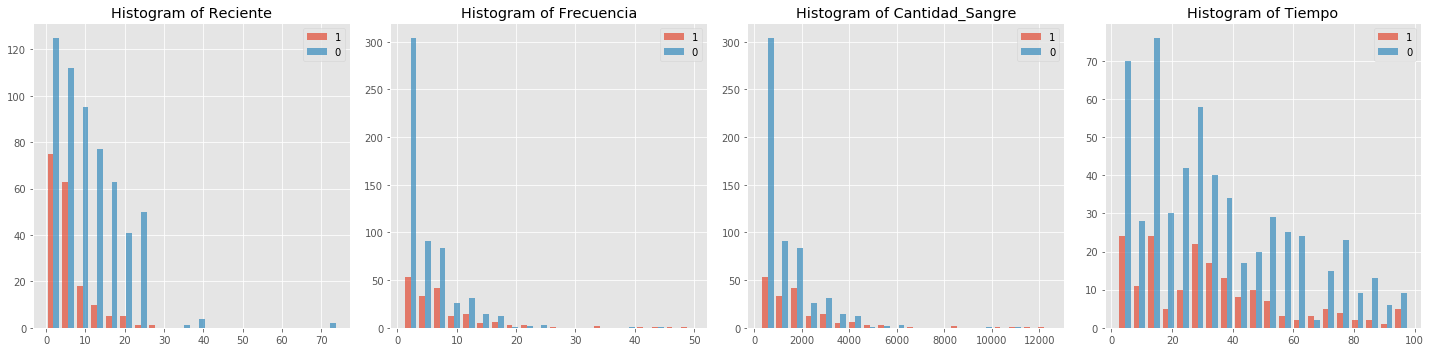

In [16]:
# Excluir la columna de la etiqueta
columns = dataset.columns[:-1]

# Crear una cuadrícula de subtramas 2x4 para histogramas y gráficos de dispersión
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Visualizar histogramas para todas las columnas
for i, column in enumerate(columns):
    axs[i].hist([dataset[dataset['Donacion_marzo'] == 1][column], 
                    dataset[dataset['Donacion_marzo'] == 0][column]], 
                   label=['1', '0'], bins=20, alpha=0.7)
    axs[i].set_title("Histogram of {}".format(column))
    axs[i].legend(loc='upper right')
# Ajustar el diseño
plt.tight_layout()
plt.show()



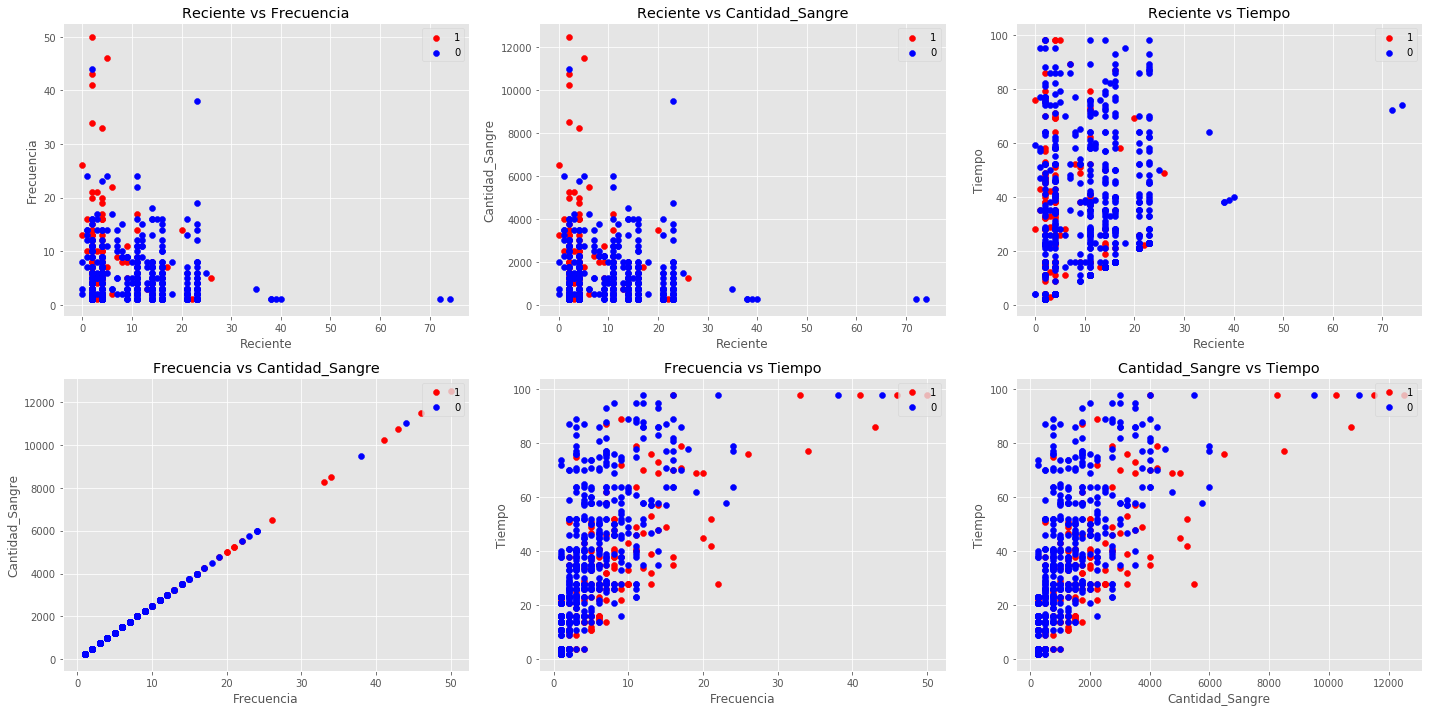

In [17]:
# Crear todas las combinaciones posibles de pares de variables
combinations = list(itertools.combinations(columns, 2))

# Calcular el número de filas necesario para acomodar todas las combinaciones
num_combinations = len(combinations)
num_rows = num_combinations // 3 + (num_combinations % 3 > 0)

# Crear una cuadrícula de subtramas con un número suficiente de filas para todas las combinaciones
fig, axs = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))  # Ajustar el tamaño de figura según sea necesario

# Visualizar gráficos de dispersión para todas las combinaciones
for j, (var1, var2) in enumerate(combinations):
    row = j // 3
    col = j % 3
    axs[row, col].scatter(dataset[dataset['Donacion_marzo'] == 1][var1], 
                          dataset[dataset['Donacion_marzo'] == 1][var2], 
                          c='red', label='1')
    axs[row, col].scatter(dataset[dataset['Donacion_marzo'] == 0][var1], 
                          dataset[dataset['Donacion_marzo'] == 0][var2], 
                          c='blue', label='0')
    axs[row, col].set_title("{} vs {}".format(var1, var2))
    axs[row, col].set_xlabel(var1)
    axs[row, col].set_ylabel(var2)
    axs[row, col].legend(loc='upper right')

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar la figura
plt.show()

 **Nota**

- **Desequilibrio de Clases**: La primera fila de histogramas muestra un claro desequilibrio de clases entre aquellos que donaron sangre en marzo de 2007 (etiqueta '1') y aquellos que no lo hicieron (etiqueta '0'). Esto puede afectar el rendimiento del modelo de aprendizaje automático, ya que puede sesgarse hacia la clase más frecuente. Se recomienda aplicar técnicas de balanceo de clases como sobremuestreo, submuestreo o generación de datos sintéticos para manejar este desequilibrio.

- **Relación entre 'Frequency' y 'Monetary'**: La correlación directa entre 'Frequency' y 'Monetary' es evidente en el gráfico de dispersión de la esquina inferior derecha, lo que indica una relación lineal casi perfecta. Esto es coherente con la naturaleza de las variables, dado que 'Monetary' es probablemente un múltiplo de 'Frequency' (cada donación tiene un volumen fijo de sangre). Esto sugiere que una de las dos variables podría ser redundante para el modelado predictivo, y se podría considerar eliminar una para simplificar el modelo sin perder información significativa.

- **Posible correlación entre 'Time' y otras variables**: Los gráficos de dispersión 'Reciente vs Tiempo' y 'Frecuencia vs Tiempo' no muestran una relación lineal clara, pero sí sugieren algún tipo de relación. Por ejemplo, en 'Reciente vs Tiempo', hay una tendencia de que aquellos con valores más bajos de 'Reciente' tienen una distribución más amplia en 'Tiempo', lo que podría sugerir que los donantes nuevos tienden a tener un historial más corto de donaciones. Sin embargo, esta observación necesita ser investigada más a fondo, posiblemente con análisis estadísticos para establecer la fuerza y la significancia de la correlación.

- **Dispersión de los datos**: Hay una dispersión considerable en los datos, especialmente en los gráficos de dispersión 'Reciente vs Frecuencia' y 'Reciente vs Cantidad_Sangre', lo que podría indicar que la variable 'Reciente' tiene una relación menos directa con la frecuencia y la cantidad de donaciones en comparación con la relación entre 'Frecuencia' y 'Cantidad_Sangre'.


**PCA:** como observalos la relación entre 'Frequency' y 'Monetary' se podría hacer una reducción dimensional para mejorar el funconamiento de KNN 

**b)** Una de las clases que implementa el algoritmo KNN en scikit-learn sklearn.neighbors.KNeighborsClassifier. Revisa los parámetros y métodos que tiene.

El [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) en scikit-learn es un clasificador que implementa la votación de los k-vecinos más cercanos. Aquí están sus parámetros y métodos basados en la documentación oficial de scikit-learn:

Parámetros:

- `n_neighbors` (int, por defecto=5): Número de vecinos a utilizar para consultas de kneighbors.
- `weights` ({'uniform', 'distance'} o callable, por defecto='uniform'): Función de peso utilizada en la predicción.
- `algorithm` ({'auto', 'ball_tree', 'kd_tree', 'brute'}, por defecto='auto'): Algoritmo utilizado para calcular los vecinos más cercanos.
- `leaf_size` (int, por defecto=30): Tamaño de hoja pasado a BallTree o KDTree.
- `p` (float, por defecto=2): Parámetro de potencia para la métrica de Minkowski.
- `metric` (str o callable, por defecto='minkowski'): La métrica de distancia a utilizar para el árbol.
- `metric_params` (dict, por defecto=None): Argumentos adicionales de palabras clave para la función métrica.
- `n_jobs` (int, por defecto=None): El número de trabajos paralelos a ejecutar para la búsqueda de vecinos.

Métodos:

- `fit`(X, y): Ajustar el clasificador a partir del conjunto de datos de entrenamiento.
- `get_metadata_routing`(): Obtener el enrutamiento de metadatos del objeto.
- `get_params`([deep]): Obtener los parámetros para este estimador.
- `kneighbors`([X, n_neighbors, return_distance]): Encontrar los K-vecinos de un punto.
- `kneighbors_graph`([X, n_neighbors, mode]): Calcular el grafo (ponderado) de k-Vecinos para los puntos en X.
- `predict`(X): Predecir las etiquetas de clase para los datos proporcionados.
- `predict_proba`(X): Devolver las estimaciones de probabilidad para los datos de prueba X.
- `score`(X, y[, sample_weight]): Devolver la precisión media en los datos de prueba y etiquetas proporcionados.
- `set_params`(**params): Establecer los parámetros de este estimador.
- `set_score_request`(*[, sample_weight]): Solicitar metadatos pasados al método `score`.


In [18]:
from sklearn.datasets import make_classification
# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define hyperparameters to test
n_neighbors_options = [3, 5, 10]
weights_options = ['uniform', 'distance']

# Store the results
results = []

# Loop over hyperparameters
for n_neighbors in n_neighbors_options:
    for weights in weights_options:
        # Create and fit the model
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        knn.fit(X_train, y_train)
        
        # Make predictions
        y_pred = knn.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results
        results.append((n_neighbors, weights, accuracy))

# Print results
for n_neighbors, weights, accuracy in results:
    print("n_neighbors: {}, weights: {}, Accuracy: {:.2f}".format(n_neighbors, weights, accuracy))
    


n_neighbors: 3, weights: uniform, Accuracy: 0.79
n_neighbors: 3, weights: distance, Accuracy: 0.79
n_neighbors: 5, weights: uniform, Accuracy: 0.80
n_neighbors: 5, weights: distance, Accuracy: 0.80
n_neighbors: 10, weights: uniform, Accuracy: 0.80
n_neighbors: 10, weights: distance, Accuracy: 0.80


**c)** División de los datos en entrenamiento (80%) y test (20%):

<span style="color:red">**MUY IMPORTANTE:**</span> Vamos a establecer una semilla con un valor predefinido inmediatamente antes de ejecutar cualquier operación con un componente aleatorio. Así aseguramos que nuestros resultados sean repetibles.

Esto es, vamos a poner `np.random.seed(SEED_VALUE)` antes de:
 - `fit()`
 - `predict()`
 
En aquellas funciones que lo admitan, sustituiremos el comando np.random.seed(SEED_VALUE) por el argumento `random_state=SEED_VALUE`. Por ejemplo, para la división de datos entre entrenamiento y test con `train_test_split`.

In [19]:
# tenemos mas ejemplos de una categoria que en otra si queremos hacer una experimentación para el conjunto de test 
# con stratify mantenga el mismo poncentaje de cadad clase  en el test y en el train en este 
# caso es para que train si hay 2 categorias mantenga la proporcion de estas en train y test decir que si en el total 
# tenemos 60% 1 y 40% 2 se intenta man tener el porcentaje de dataos 
dataset_train, dataset_test = train_test_split(dataset,
                            test_size=0.2, random_state=SEED_VALUE,
                                              stratify=dataset["Donacion_marzo"])
print(dataset_test.shape)
display(dataset_test.head())

(150, 5)


Reciente  Frecuencia  Cantidad_Sangre  Tiempo  Donacion_marzo
309        16           3              750      19               0
711        23           6             1500      45               0
343        11           1              250      11               0
462        21           1              250      21               1
646        14           2              500      14               0

## Gestión de valores faltantes

En este caso, nuestro dataset no tiene valores faltantes.
Sin embargo, la sustitución de las variables predictoras por la media se llevaría a cabo de la siguiente manera. 

In [20]:
#imp = SimpleImputer(missing_values=np.nan, fill_value='mean')
#imp = imp.fit(dataset_train)  # La media la calculamos SÓLO a partir del conjunto de train

# Los valores van a ser los mismos que antes, pues no tenemos datos faltantes
#dataset_train_prep = imp.transform(dataset_train)
#dataset_test_prep = imp.transform(dataset_test)

#dataset_test_prep

`SimpleImputer` ha convertido nuestros valores a un array NumPy, por lo que sería bueno que los volviéramos a convertir en formato dataframe.

In [21]:
#dataset_train = pd.DataFrame(dataset_train_prep,
#                             columns=dataset_train.columns,
#                             index=dataset_train.index)
#dataset_test = pd.DataFrame(dataset_test_prep,
#                            columns=dataset_test.columns,
#                            index=dataset_test.index)

#dataset_test

## Separación de variables predictoras y dependientes

In [22]:
dataset_train_X = dataset_train.loc[:, NAME_BLOOD[:-1]].astype(float)
dataset_train_Y = dataset_train.loc[:, NAME_BLOOD[-1]]

print("dimension:",dataset_train_X.shape)
display(dataset_train_X.head())


('dimension:', (598, 4))


Reciente  Frecuencia  Cantidad_Sangre  Tiempo
619       4.0         1.0            250.0     4.0
357      14.0         3.0            750.0    26.0
405      14.0         3.0            750.0    41.0
700      16.0         3.0            750.0    35.0
479      23.0         1.0            250.0    23.0

In [23]:
dataset_test_X = dataset_test.loc[:, NAME_BLOOD[:-1]].astype(float)
dataset_test_Y = dataset_test.loc[:, NAME_BLOOD[-1]]

print("dimension:",dataset_train_X.shape)
display(dataset_test_X.head())

('dimension:', (598, 4))


Reciente  Frecuencia  Cantidad_Sangre  Tiempo
309      16.0         3.0            750.0    19.0
711      23.0         6.0           1500.0    45.0
343      11.0         1.0            250.0    11.0
462      21.0         1.0            250.0    21.0
646      14.0         2.0            500.0    14.0

## Estandarización de los datos

Esto hay que hacerlo **DESPUÉS** de dividir en conjuntos de entrenamiento y test.

Además, como es un problema de clasificación, **NO** estandarizaremos la variable dependiente.

In [24]:
scaler = StandardScaler()

scaler.fit(dataset_train_X)

dataset_train_X_scaled = scaler.transform(dataset_train_X)
dataset_test_X_scaled = scaler.transform(dataset_test_X)

#dataset_test_X_scaled

Estos son los valores con los que se ha estandarizado.

In [25]:
print("mean {}: {}  |  std {}: {}".format(NAME_BLOOD[:-1],scaler.mean_, NAME_BLOOD[:-1],scaler.scale_))

mean ['Reciente', 'Frecuencia', 'Cantidad_Sangre', 'Tiempo']: [   9.5083612     5.63712375 1409.28093645   34.87959866]  |  std ['Reciente', 'Frecuencia', 'Cantidad_Sangre', 'Tiempo']: [   7.89304107    5.89317612 1473.29403119   24.72995729]


## Empezamos con la experimentación de KNN

Hemos visualizado y preprocesado los datos. Vamos a empezar a trabajar con nuestro predictor.

## Definimos un rango de hiperparámetros para realizar las pruebas

In [27]:

hyperparameters = {
    'n_neighbors': range(1, 598, 1),
    'weights': ['uniform', 'distance'],  # 'callable' no es un valor literal válido, se debe reemplazar con una función concreta si se desea usar.
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 50),  # Por ejemplo, valores entre 1 y 50. El valor óptimo puede variar dependiendo del tamaño del conjunto de datos.
    'p': [1, 2],  # 1 corresponde a la distancia de Manhattan y 2 a la distancia euclidiana.
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Puedes agregar más métricas compatibles con tu conjunto de datos.
    # 'metric_params': None,  # Este es un diccionario de parámetros adicionales para la función métrica y su estructura dependerá de la métrica específica que estés utilizando.
    'n_jobs': [-1]  # Utilizar -1 para usar todos los procesadores disponibles y acelerar la búsqueda.
}
# hay que llegar en los extremos las graficas de aqui pued ser minimo local y hay que exporara un poco mas

# Expected n_neighbors <= n_samples,  n_samples = 477
# Si solo necesitas el número de muestras
n_samples = dataset_train_X_scaled.shape[0]

# ('Numero de muestras:', 598) auque pone este valor al usar  GridSearchCV me indica que son 477 en el
# cesga usamos 130 ya que en este caso comprobamos en el portatil que se comporta de manera similar
print("Numero de muestras:", n_samples)

hyperparameters = {
    'n_neighbors': range(1, 130, 1),
    'n_jobs': [-1]  # Utilizar -1 para usar todos los procesadores disponibles y acelerar la búsqueda.
}
# hay


('Numero de muestras:', 598)


## Comenzamos las pruebas con 5-CV

In [28]:
k_neigh = KNeighborsClassifier()
modelCV = GridSearchCV(k_neigh,
                       hyperparameters,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV.fit(dataset_train_X_scaled, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...13, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [30]:
with open('model_train_class.pkl', 'wb') as f:
    pickle.dump(modelCV, f, protocol=pickle.HIGHEST_PROTOCOL)

Muestra la gráfica del error de entrenamiento con validación cruzada (5-CV) frente al valor
del hiper-parámetro.
**¿Cuál es el menor error de validación cruzada, su desviación estándar
y el valor del hiper-parámetro para el que se consigue? ¿Cuál es el valor del hiper-
parámetro si se aplicase la regla de una desviación estándar? En caso de que haya varios
modelos con error mínimo, debe seleccionarse siempre el más simple (cuantos mas vecinos mas simple por que la frontera de decisión es mas suave).**

## Resultados obtenidos en 5-CV

Puede verse el ranking de los mejores

In [31]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']].head()


param_n_neighbors  mean_test_score  std_test_score  rank_test_score
0                 1         0.690635        0.043466              129
1                 2         0.765886        0.025037               69
2                 3         0.735786        0.028472              128
3                 4         0.760870        0.029218              125
4                 5         0.767559        0.024084               66

Los mejores hiperparámetros en validación serían los siguientes (aunque no siempre conviene quedarse con los mejores):

In [32]:
cv_results_best = cv_results[cv_results['rank_test_score'] == 1]
cv_results_best.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
21                22         0.795987        0.013456                1

## Gráfica de entrenamiento

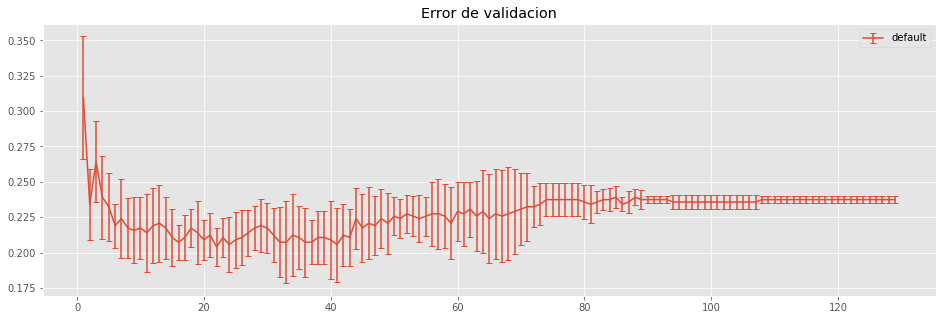

In [33]:
# separamos los pesos basados en cada 
cv_results_uniform = cv_results

plt.figure(figsize=(16, 5))  # Puedes cambiar estos valores según tus necesidades
# eje x xantidad de vecinos y en el y cuanto es el errror
plt.title("Error de validacion")
plt.errorbar(cv_results_uniform['param_n_neighbors'],1 - cv_results_uniform['mean_test_score'],
             cv_results_uniform['std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [34]:
# Resultados obtenidos en 5-CV
cv_results = pd.DataFrame(modelCV.cv_results_)
# Guardar los resultados completos en un archivo CSV
cv_results.to_csv('cv_results.csv', index=False)

# Filtrar y guardar los mejores resultados
cv_results_best = cv_results[cv_results['rank_test_score'] == 1]
cv_results_best.to_csv('cv_results_best.csv', index=False)

# Separar los resultados por tipo de peso y guardarlos
cv_results_uniform = cv_results
cv_results_uniform.to_csv('cv_results_uniform.csv', index=False)


In [35]:
cv_results_best = cv_results[cv_results['rank_test_score'] == 1].sort_values(by='param_n_neighbors')
cv_results_best.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
21                22         0.795987        0.013456                1

In [36]:
# Aplicar la regla de una desviación estándar
best_model = cv_results[cv_results['rank_test_score'] == 1].sort_values(by='param_n_neighbors').iloc[0]
mejor_score = best_model['mean_test_score']
mejor_std = best_model['std_test_score']


threshold =  mejor_score -  mejor_std

cv_results_aux = cv_results[
     cv_results['mean_test_score']>= threshold
].sort_values(by='param_n_neighbors', ascending=False)

cv_results_aux = cv_results_aux.loc[:, [
    'param_n_neighbors',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]
]

cv_results_aux = cv_results_aux.sort_values(by='param_n_neighbors',ascending=False)
display(cv_results_aux.head())



param_n_neighbors  mean_test_score  std_test_score  rank_test_score
44                45         0.782609        0.024229               28
42                43         0.789298        0.020179               12
41                42         0.787625        0.021714               20
40                41         0.794314        0.026141                2
39                40         0.790970        0.027378                9

In [37]:
cv_results_aux = cv_results_aux.sort_values(by='param_n_neighbors')
display(cv_results_aux)

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
7                  8         0.782609        0.020868               28
8                  9         0.784281        0.023357               27
9                 10         0.782609        0.021667               28
10                11         0.785953        0.027392               24
13                14         0.782609        0.021838               28
14                15         0.789298        0.020074               12
15                16         0.792642        0.012223                4
16                17         0.789298        0.016200               12
17                18         0.782609        0.013398               28
18                19         0.785953        0.022195               24
19                20         0.790970        0.014011                9
20                21         0.787625        0.015390               20
21                22         0.795987        0.013456                1
22                23         0.789298        0.013528               12
23                24         0.794314        0.019493                2
24                25         0.790970        0.019656                9
25                26         0.789298        0.019719               12
26                27         0.785953        0.016364               24
27                28         0.782609        0.015859               28
29                30         0.782609        0.017974               28
30                31         0.787625        0.019234               20
31                32         0.792642        0.024739                4
32                33         0.792642        0.029133                4
33                34         0.787625        0.029086               20
34                35         0.789298        0.022401               12
35                36         0.792642        0.024409                4
36                37         0.792642        0.015620                4
37                38         0.789298        0.018889               12
38                39         0.789298        0.018889               12
39                40         0.790970        0.027378                9
40                41         0.794314        0.026141                2
41                42         0.787625        0.021714               20
42                43         0.789298        0.020179               12
44                45         0.782609        0.024229               28



A continuación la gráfica que usamos para decidir los valores de los hiper-parámetros (mediante la regla de una desviación estándar), supongamos que cualquier valor que en su desviación cruce com la linea generada en color azul , e un valor a tener encuenta, tambien permitimos que visualizar el error minimo obtenido en verde:


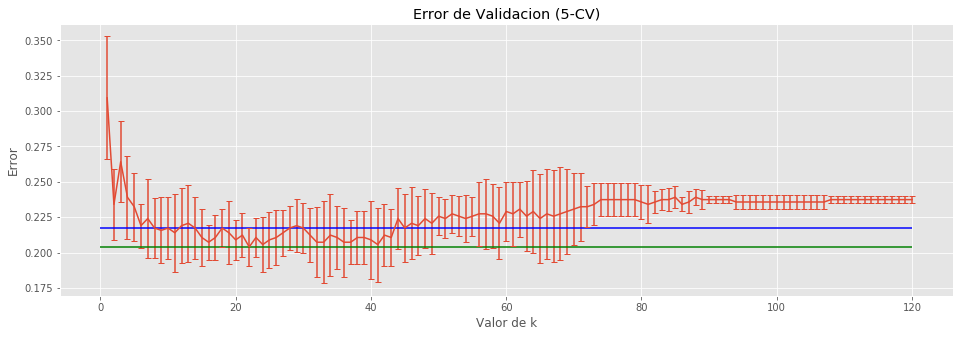

In [38]:

fig, ax = plt.subplots(figsize=(16, 5), ncols=1, nrows=1)
ax.set_title("Error de Validacion (5-CV)")

ax.set_xlabel("Valor de k")
ax.set_ylabel("Error")
subset = cv_results_uniform[cv_results_uniform['param_n_neighbors'] <= 120]
ax.errorbar(subset['param_n_neighbors'],1 - subset['mean_test_score'],
             subset['std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
ax.hlines(y=1-threshold, xmin=0, xmax=120, colors='blue')

ax.hlines(y=1-mejor_score, xmin=0, xmax=120, colors='green')

El valor que escogeríamos por tanto sería:

In [40]:
display(cv_results.loc[44:44, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']])

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
45                46         0.779264        0.025452               39

In [41]:
display(cv_results.loc[73:73, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']])

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
73                74         0.762542        0.011568               90

Muestra la gráfica del error de test frente al valor del hiper-parámetro, y valora si la gráfica
del error de entrenamiento con validación cruzada ha hecho una buena estimación del error de test.**¿Cuál es el error de test para el valor del hiper-parámetro seleccionado por la validación cruzada?**

## Verificación de nuestros hiperparámetros

Esto no se haría **JAMÁS** en una situación real.
Pero como este es un ejemplo para aprender, vamos a ver cómo de lejos nos hemos quedado de los hiperparámetros "ideales".

Hacemos un Grid Search utilizando el conjunto de entrenamiento al completo (80% de los datos) y nuestro conjunto de validación va a ser el conjunto de test (20% de los datos).

In [43]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y) + [0]*len(dataset_test_Y)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_scaled, dataset_test_X_scaled])
dataset_all_Y = pd.concat([dataset_train_Y, dataset_test_Y])

k_neigh = KNeighborsClassifier()
modelCV_test = GridSearchCV(k_neigh,
                       hyperparameters,
                       cv=ps,
                       scoring='accuracy',
                       return_train_score=True)

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV_test.fit(dataset_all_X_scaled, dataset_all_Y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...13, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [44]:
test_results = pd.DataFrame(modelCV_test.cv_results_)
test_results.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'rank_test_score']].head()

param_n_neighbors  mean_test_score  rank_test_score
0                 1         0.680000              129
1                 2         0.773333               61
2                 3         0.766667               89
3                 4         0.773333               61
4                 5         0.786667               12

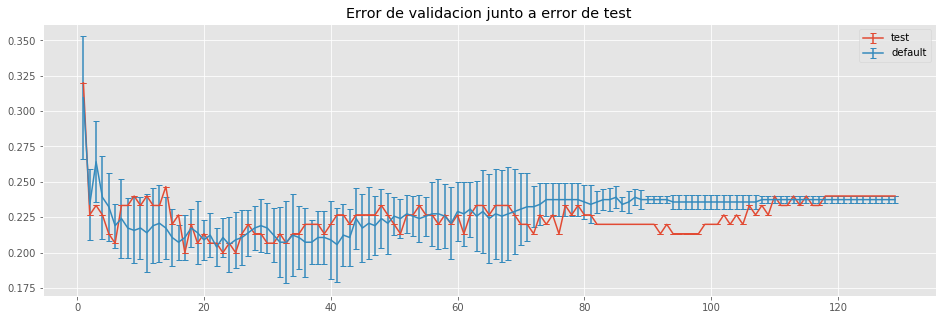

In [45]:
plt.figure(figsize=(16, 5))  # Puedes cambiar estos valores según tus necesidades
# eje x xantidad de vecinos y en el y cuanto es el errror
plt.title("Error de validacion junto a error de test")
plt.errorbar(test_results['param_n_neighbors'],1 - test_results['mean_test_score'],
             test_results['std_test_score'], label='test', capsize=3)  # 1 - [] para imprimir el error
plt.errorbar(cv_results_uniform['param_n_neighbors'],1 - cv_results_uniform['mean_test_score'],
             cv_results_uniform['std_test_score'], label='default', capsize=3) 
plt.legend(loc='upper right')
plt.show()

In [51]:
cv_results_best_test = test_results[test_results['rank_test_score'] == 1].sort_values(by='param_n_neighbors')
cv_results_best_test.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
16                17              0.8             0.0                1
22                23              0.8             0.0                1
24                25              0.8             0.0                1

**Modelo selecionado con la validación cruzada**

In [52]:
test_results.loc[21:21, [ 'param_n_neighbors', 'mean_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  rank_test_score
21                22         0.793333                4

El error viene dado por: 1 - mean_test_score = 1 - 0.793333 = 0.206667

**Modelo seleciondo con la regla de la desviación estandar**

In [53]:
test_results.loc[44:44, [ 'param_n_neighbors', 'mean_test_score', 'rank_test_score']]


param_n_neighbors  mean_test_score  rank_test_score
44                45         0.773333               61

In [ ]:
El error viene dado por: 1 - mean_test_score = 1 - 0.773333 = 0.226667

In [54]:
test_results.loc[73:73, [ 'param_n_neighbors', 'mean_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  rank_test_score
73                74             0.78               31

El error viene dado por: 1 - mean_test_score = 1 - 0.78 = 0.22

In [55]:
test_results.loc[17:26, [ 'param_n_neighbors', 'mean_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  rank_test_score
17                18         0.780000               31
18                19         0.793333                4
19                20         0.786667               12
20                21         0.793333                4
21                22         0.793333                4
22                23         0.800000                1
23                24         0.793333                4
24                25         0.800000                1
25                26         0.786667               12
26                27         0.780000               31

Se observa que el 22 que era el supuesto mejor en trenamiento no dista mucho del score que saca el mejor en test por otro lado se observa que los mejores en test estan dentro de los modelos candidatos obtenidos por  la regla de una desviación estándar. por lo que podria decirse que entorno al 20-25 es donde se encuentra el minimo global

### Prueba a la hora de usar menos dimesiones

Como se comentó anterior mente  exitste una relación entre 'Frequency' y 'Monetary' por lo que se quiere observar si al reducir las dimensiones eliminando Frequency o Monetary hay mejoras, baja el rendimiento o se comporta de manera similar

In [56]:
dataset_train_X_reduce = dataset_train.loc[:,["Reciente","Frecuencia","Tiempo"]].astype(float)

dataset_test_X_reduce = dataset_test.loc[:, ["Reciente","Frecuencia","Tiempo"]].astype(float)


scaler = StandardScaler()

scaler.fit(dataset_train_X_reduce)

dataset_train_X_reduce_scaled = scaler.transform(dataset_train_X_reduce)
dataset_test_X_reduce_scaled = scaler.transform(dataset_test_X_reduce)

dataset_test_X_scaled

# ('Numero de muestras:', 598) auque pone este valor al usar  GridSearchCV me indica que son 477
print("Numero de muestras:", n_samples)

hyperparameters = {
    'n_neighbors': range(1, 120, 1),
    'n_jobs': [-1]  # Utilizar -1 para usar todos los procesadores disponibles y acelerar la búsqueda.
}
# hay
k_neigh = KNeighborsClassifier()
modelCV_reduce = GridSearchCV(k_neigh,
                       hyperparameters,
                       cv=5,
                       scoring='accuracy', # parametro  top mejores en regresion mean scare error(skle pueda dar - std)
                       return_train_score=True)  # El warning es normal, pues el ejemplo es demasiado pequeño

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
modelCV_reduce.fit(dataset_train_X_reduce, dataset_train_Y)  # En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias

('Numero de muestras:', 598)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...03, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [57]:
cv_results_reduce = pd.DataFrame(modelCV_reduce.cv_results_)
cv_results.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']].head()

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
0                 1         0.690635        0.043466              129
1                 2         0.765886        0.025037               69
2                 3         0.735786        0.028472              128
3                 4         0.760870        0.029218              125
4                 5         0.767559        0.024084               66

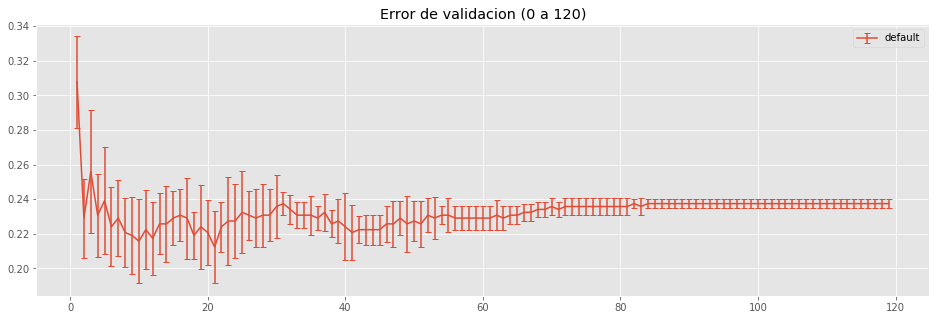

In [58]:
# Primera gráfica: De 0 a 110
plt.figure(figsize=(16, 5))
plt.title("Error de validacion (0 a 120)")
subset = cv_results_reduce[cv_results_reduce['param_n_neighbors'] <= 120]
plt.errorbar(subset['param_n_neighbors'],1 - subset['mean_test_score'],
             subset['std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

**Nota** Como podemos observar tiene un comportamiento similar que usar la variable comprobemos el resto de pasos


In [59]:
cv_results_best = cv_results_reduce[cv_results_reduce['rank_test_score'] == 1].sort_values(by='param_n_neighbors')
cv_results_best.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
20                21         0.787625        0.020918                1

In [60]:
# Aplicar la regla de una desviación estándar
best_model = cv_results_reduce[cv_results_reduce['rank_test_score'] == 1].sort_values(by='param_n_neighbors').iloc[0]
mejor_score = best_model['mean_test_score']
mejor_std = best_model['std_test_score']


threshold =  mejor_score -  mejor_std

cv_results_aux = cv_results[
     cv_results['mean_test_score']>= threshold
].sort_values(by='param_n_neighbors', ascending=False)

cv_results_aux = cv_results_aux.loc[:, [
    'param_n_neighbors',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]
]

cv_results_aux = cv_results_aux.sort_values(by='param_n_neighbors',ascending=False)
cv_results_aux.head()

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
71                72         0.767559        0.014624               66
70                71         0.767559        0.024064               66
69                70         0.769231        0.025500               64
68                69         0.770903        0.030236               61
67                68         0.772575        0.032762               55

In [61]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y) + [0]*len(dataset_test_Y)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_reduce_scaled, dataset_test_X_reduce_scaled])
dataset_all_Y = pd.concat([dataset_train_Y, dataset_test_Y])

k_neigh = KNeighborsClassifier()
modelCV_test_reduce = GridSearchCV(k_neigh,
                       hyperparameters,
                       cv=ps,
                       scoring='accuracy',
                       return_train_score=True)

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV_test_reduce.fit(dataset_all_X_scaled, dataset_all_Y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...03, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [62]:
test_results_reduce = pd.DataFrame(modelCV_test_reduce.cv_results_)
#test_results.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'rank_test_score']]

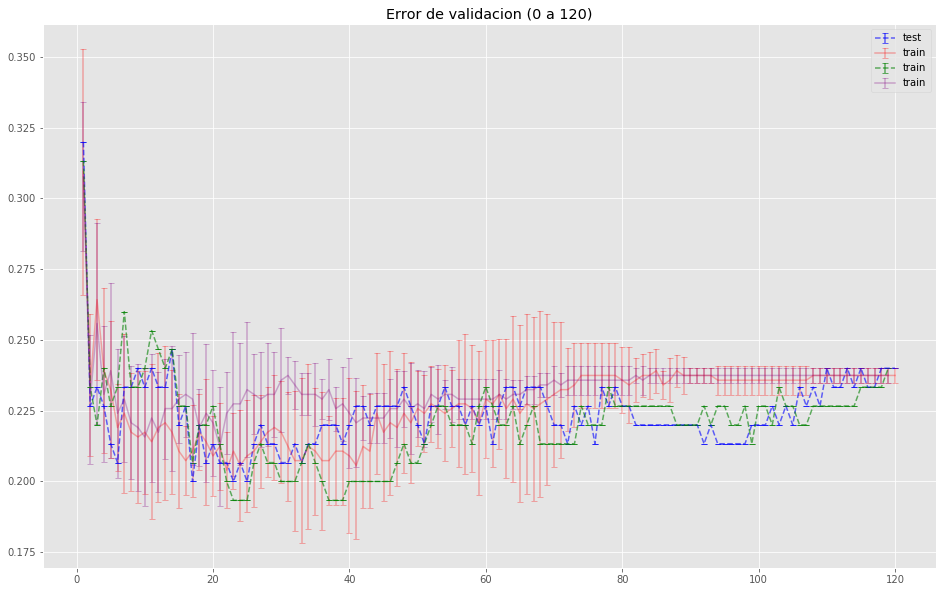

In [63]:
plt.figure(figsize=(16, 10))
plt.title("Error de validacion (0 a 120)")

subset_reduce = cv_results_reduce[test_results_reduce['param_n_neighbors'] <= 120]

subset_test_reduce= test_results_reduce[test_results['param_n_neighbors']<= 120]

subset = cv_results[cv_results['param_n_neighbors'] <= 120]

subset_test= test_results[test_results['param_n_neighbors']<= 120]

plt.errorbar(subset_test['param_n_neighbors'],1 - subset_test['mean_test_score'],
             subset_test['std_test_score'], label='test', capsize=3,alpha=0.6,  color='blue',linestyle='--')  # 1 - [] para imprimir el error

plt.errorbar(subset['param_n_neighbors'],1 - subset['mean_test_score'],
             subset['std_test_score'], label='train', capsize=3,alpha=0.3, color='red', )  # 1 - [] para imprimir el error

plt.errorbar(subset_test_reduce['param_n_neighbors'],1 - subset_test_reduce['mean_test_score'],
             subset_test_reduce['std_test_score'], label='train', capsize=3,alpha=0.6,  color='green', linestyle='--')  # 1 - [] para imprimir el error

plt.errorbar(subset_reduce['param_n_neighbors'],1 - subset_reduce['mean_test_score'],
             subset_reduce['std_test_score'], label='train', capsize=3,alpha=0.3, color='purple')  # 1 - [] para imprimir el error

plt.legend(loc='upper right')
plt.show()

In [64]:
cv_results_best_test = subset_test_reduce[subset_test_reduce['rank_test_score'] == 1].sort_values(by='param_n_neighbors')
cv_results_best_test.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
22                23         0.806667             0.0                1
23                24         0.806667             0.0                1
24                25         0.806667             0.0                1
36                37         0.806667             0.0                1
37                38         0.806667             0.0                1
38                39         0.806667             0.0                1

**Modelo selecionado por validación cruzada**

In [65]:
subset_test_reduce.loc[20:20, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
20                21         0.786667             0.0               28

**Modelo selecionado por regla de la desviación estándar**

In [67]:
subset_test_reduce.loc[71:71, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
71                72         0.786667             0.0               28

En ambos casos comprobamos que los modelos selecionados empeoran entre 1.4 % en comparación 

Comprobamdo si se encuentra un minimo global entre el 20 y el 26 o entorno al 40

In [70]:
subset_test_reduce.loc[19:26, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
19                20         0.773333             0.0               65
20                21         0.786667             0.0               28
21                22         0.800000             0.0                7
22                23         0.806667             0.0                1
23                24         0.806667             0.0                1
24                25         0.806667             0.0                1
25                26         0.793333             0.0               19
26                27         0.786667             0.0               28

In [71]:
subset_test_reduce.loc[38:45, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]

param_n_neighbors  mean_test_score  std_test_score  rank_test_score
38                39         0.806667             0.0                1
39                40         0.800000             0.0                7
40                41         0.800000             0.0                7
41                42         0.800000             0.0                7
42                43         0.800000             0.0                7
43                44         0.800000             0.0                7
44                45         0.800000             0.0                7
45                46         0.800000             0.0                7

En comparación con el de usar todos los modelos hay cierta mejora permitiendo que haya una mayor simplificación del modelo ya que al usar mas vecino suavizamos la frontera

### Ejercio 3.

Repite el ejercicio 2 pero para el problema de regresión [Energy Efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency) con la variable de salida
cooling load. Al ser un problema de regresión deberás utilizar KNeighborsRegressor, y como medida
de error de entrenamiento y test el MSE.

Nota. Al ser un problema de regresión, para estimar tanto el error de entrenamiento como el de
test (MSE) es necesario desestandarizar los errores calculados. Para desestandarizar el campo
`mean_test_score`, únicamente será necesario multiplicar cada valor por la varianza (cuadrado de la
desviación estándar) de las observaciones de Y del conjunto de entrenamiento. No se debe restar la
media, ya que los campos `splitX_test_score` se calculan como la diferencia entre el valor de
groundtruth y la predicción para cada dato de test, por lo que todas las operaciones de adición o
substracción ya se han tenido en cuenta. De forma similar, para desestandarizar el campo
`std_test_score`, únicamente será necesario multiplicar cada valor por la varianza de las
observaciones de Y del conjunto de entrenamiento.



In [72]:
!pwd

/home/usc/cursos/curso111/AE/4_seleccion_de_modelos_y_KNN


In [6]:
DATASET_ENERGY='./data/energy+efficiency/EnergyEfficiency.data'
# Leer el archivo de datos y obtener la primera fila como nombres de columnas
data = pd.read_csv(DATASET_ENERGY)
NAME_ENERGY = data.columns.tolist()
#print(NAME_ENERGY)
#NAME_ENERGY=["Reciente","Frecuencia","Cantidad_Sangre","Tiempo","Donacion_marzo"]


if os.path.exists(DATASET_ENERGY):
    dataset_energy = pd.read_csv(DATASET_ENERGY, 
                          delimiter=DATASET_DELIMITER,
                          header=None,
                          skiprows=1,
                          names = NAME_ENERGY)
else:
    dataset_energy = d.DataFrame(np.array(
    [[0, 3, 2, 1], 
    [3, 0, 3, 0], 
    [0, 3, -1, 0], 
    [3, 0, 0, 1], 
    [1, 2, 1, 1], 
    [2, 1, 0, 0]]), columns=['X1', 'X2', 'X3', 'Y'])
    
dataset_energy

X1     X2     X3      X4   X5  X6   X7  X8  Y2\t\t
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0   21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0   21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0   21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0   21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0   28.28
..    ...    ...    ...     ...  ...  ..  ...  ..     ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5   21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5   16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5   17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5   16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5   16.03

[768 rows x 9 columns]

In [5]:
print('Tipo del dato de cada columna:')
print(dataset_energy.dtypes)
# Comprobamos si hay nan
print("\n Cantidad de valores NaN en cada columna:")
dataset_energy.isna().sum()

Tipo del dato de cada columna:
X1        float64
X2        float64
X3        float64
X4        float64
X5        float64
X6          int64
X7        float64
X8          int64
Y2\t\t    float64
dtype: object

 Cantidad de valores NaN en cada columna:


X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
Y2\t\t    0
dtype: int64

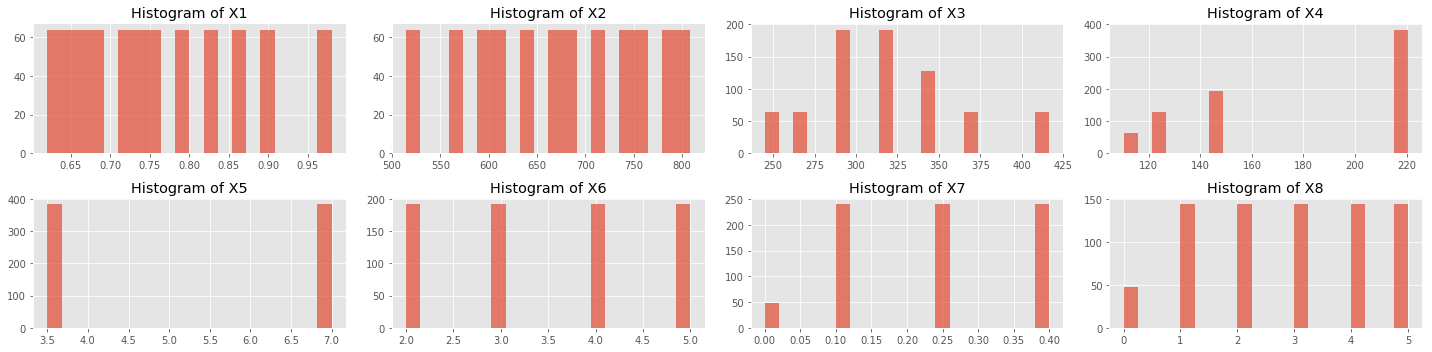

In [75]:
# Excluir la columna de la etiqueta
columns = dataset_energy.columns[:-1]

# Crear una cuadrícula de subtramas 2x4 para histogramas y gráficos de dispersión
fig, axs = plt.subplots(2, 4, figsize=(20, 5))

# Visualizar histogramas para todas las columnas
for i, column in enumerate(columns):
    row = i // 4  # Determinar la fila de la subtrama
    col = i % 4   # Determinar la columna de la subtrama
    axs[row, col].hist(dataset_energy[column], bins=20, alpha=0.7)
    axs[row, col].set_title("Histogram of {}".format(column))
# Ajustar el diseño
plt.tight_layout()
plt.show()

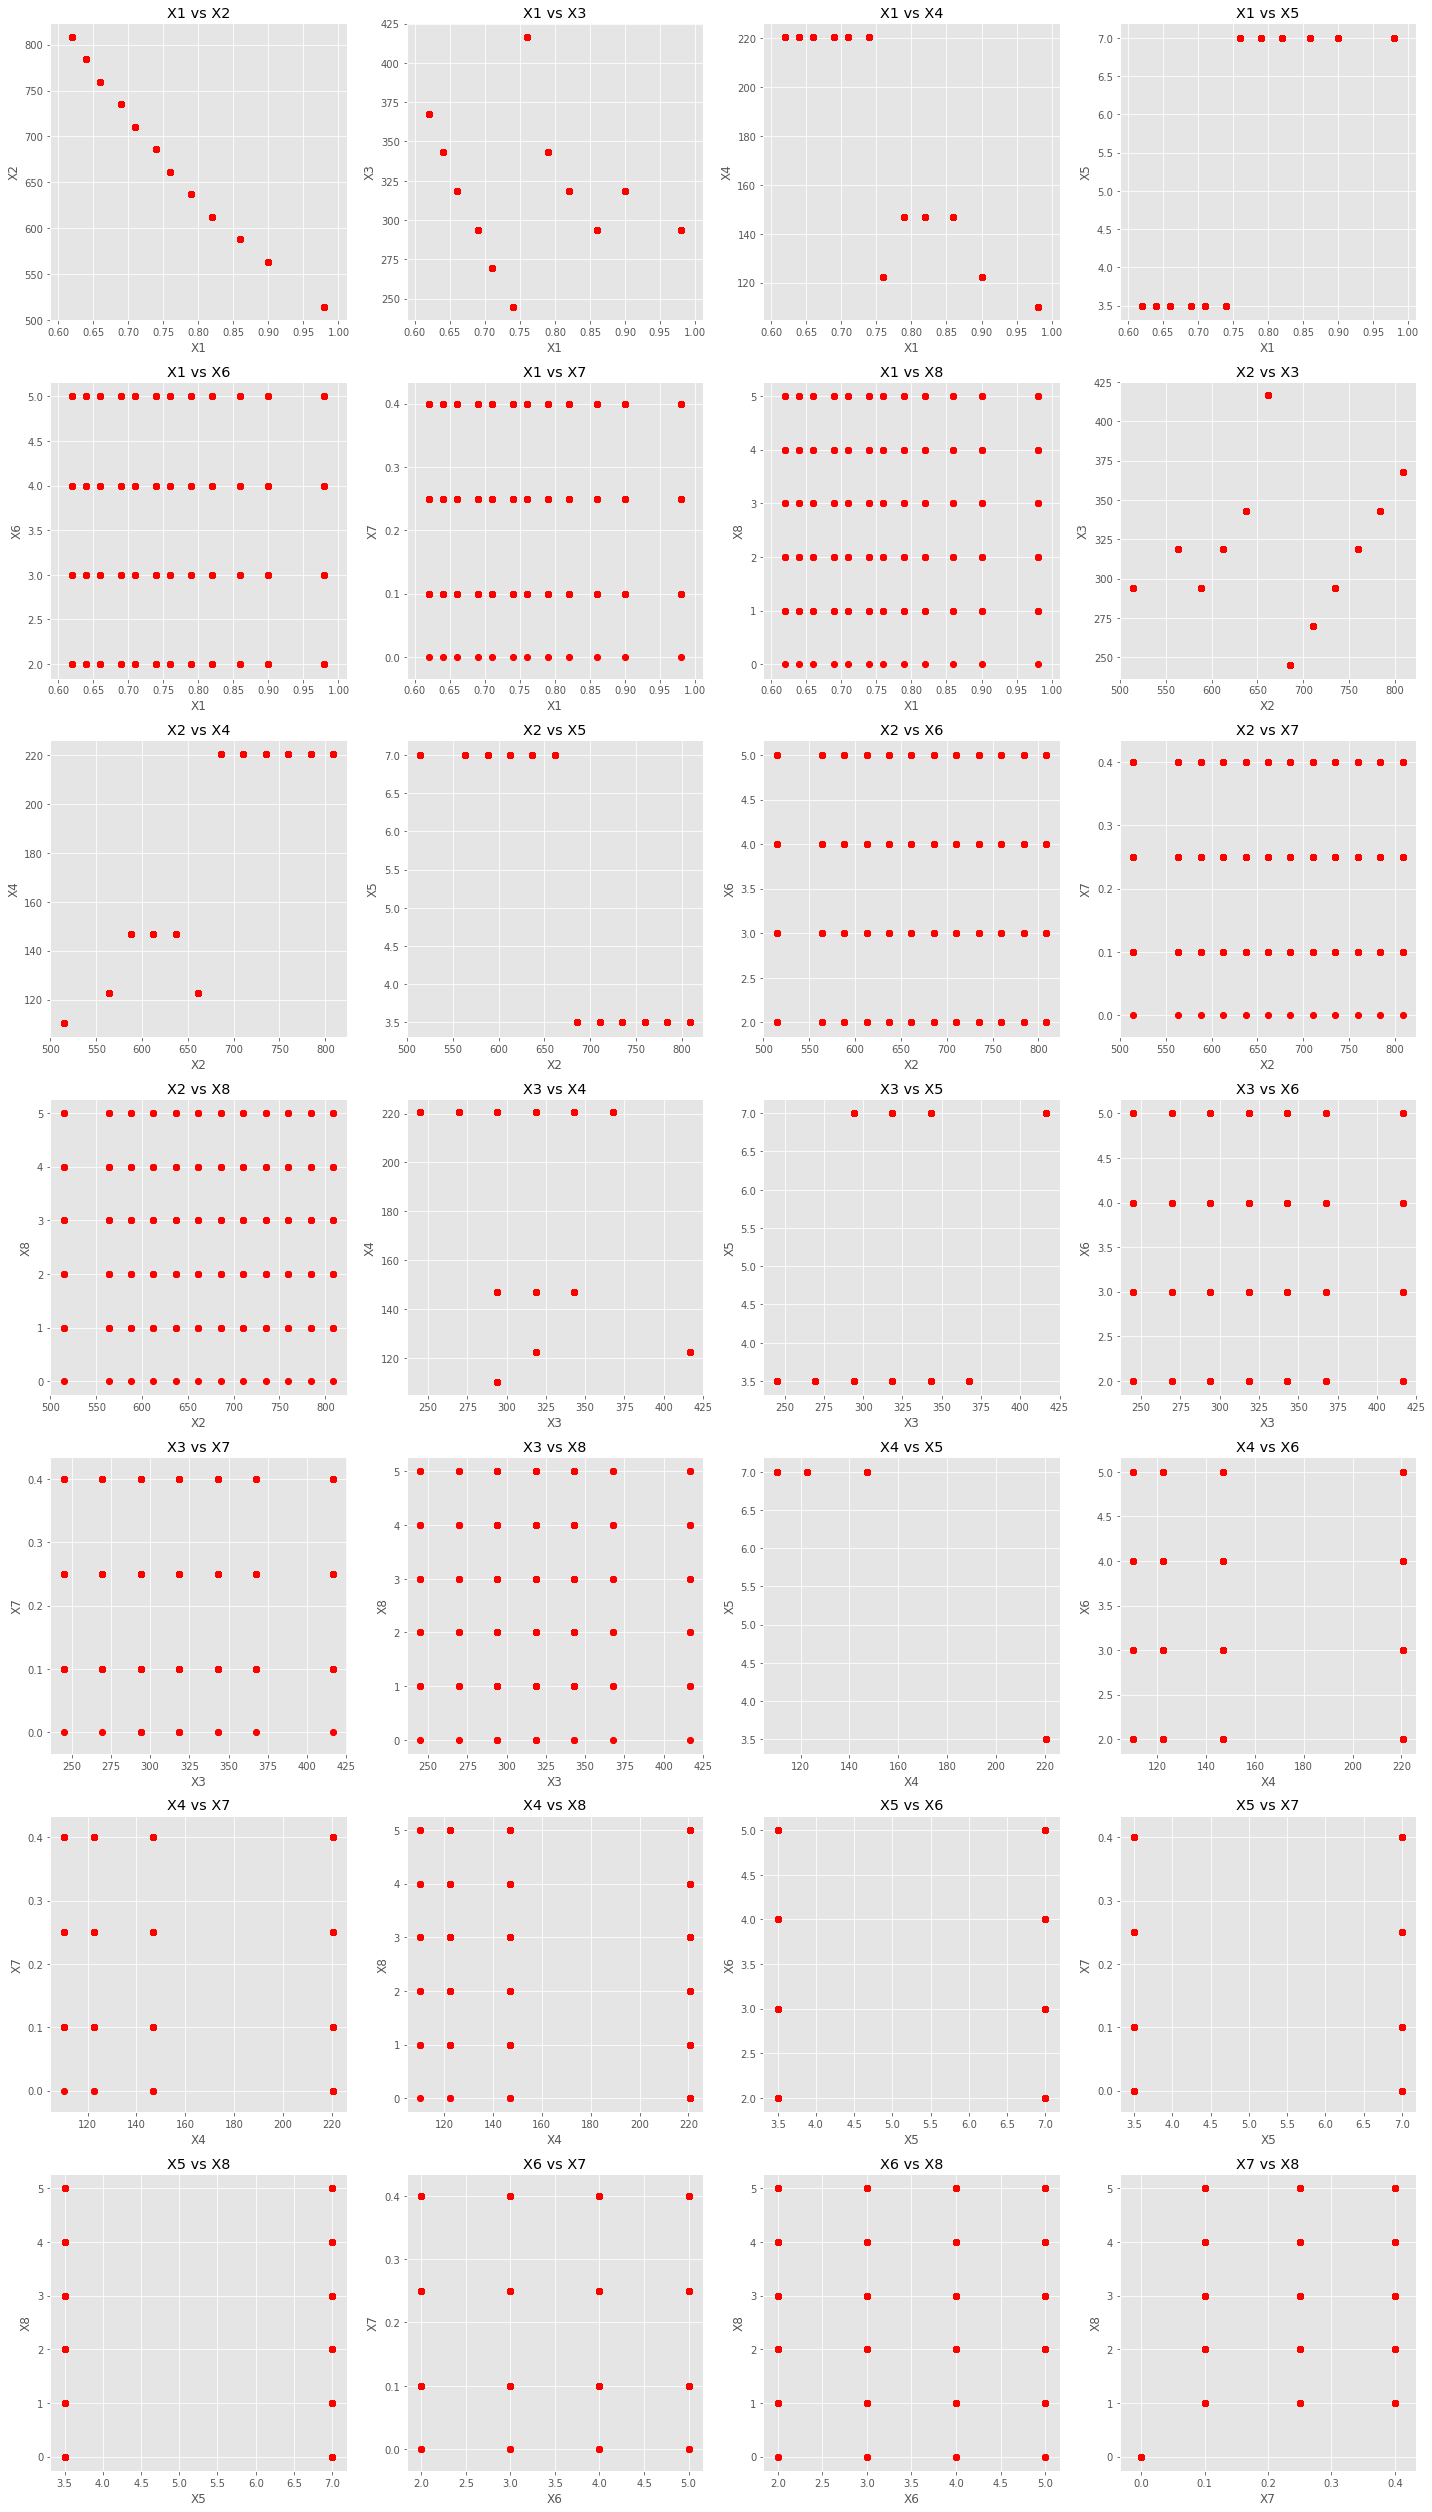

In [76]:
# Crear todas las combinaciones posibles de pares de variables
combinations = list(itertools.combinations(columns, 2))

num_cols=4
# Calcular el número de filas necesario para acomodar todas las combinaciones
num_combinations = len(combinations)
num_rows = num_combinations // num_cols + (num_combinations % num_cols > 0)

# Crear una cuadrícula de subtramas con un número suficiente de filas para todas las combinaciones
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # Ajustar el tamaño de figura según sea necesario

# Visualizar gráficos de dispersión para todas las combinaciones
for j, (var1, var2) in enumerate(combinations):
    row = j // num_cols
    col = j % num_cols
    axs[row, col].scatter(dataset_energy[var1], 
                          dataset_energy[var2], 
                          c='red')
    axs[row, col].set_title("{} vs {}".format(var1, var2))
    axs[row, col].set_xlabel(var1)
    axs[row, col].set_ylabel(var2)

# Ajustar el diseño para que no haya superposición
plt.tight_layout()

# Mostrar la figura
plt.show()

Se puede observar una cierta relación inversamente proporcional entre X1 Y X2  para otras variables no se opserva relaciones entre ellas.


## KNeighborsRegressor en scikit-learn

El `sklearn.neighbors.KNeighborsRegressor` es un regresor que implementa la regresión basada en los k-vecinos más cercanos.

### Parámetros

- **n_neighbors** (int, default=5): Número de vecinos a utilizar.
- **weights** ({'uniform', 'distance'} o callable, default='uniform'): Función de peso utilizada en la predicción.
- **algorithm** ({'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'): Algoritmo para calcular los vecinos más cercanos.
- **leaf_size** (int, default=30): Tamaño de hoja para BallTree o KDTree.
- **p** (float, default=2): Parámetro de potencia para la métrica de Minkowski.
- **metric** (str o callable, default='minkowski'): Métrica de distancia a utilizar.
- **metric_params** (dict, default=None): Argumentos adicionales para la función métrica.
- **n_jobs** (int, default=None): Número de trabajos paralelos para la búsqueda de vecinos.

### Métodos

- **fit(X, y)**: Ajustar el modelo a los datos de entrenamiento.
- **get_params([deep])**: Obtener los parámetros del estimador.
- **kneighbors([X, n_neighbors, return_distance])**: Encontrar los K-vecinos de un punto.
- **kneighbors_graph([X, n_neighbors, mode])**: Calcular el grafo de k-Vecinos.
- **predict(X)**: Predecir los valores objetivo.
- **score(X, y[, sample_weight])**: Coeficiente de determinación \( R^2 \) de la predicción.
- **set_params(**params)**: Establecer los parámetros del estimador.


División de los datos en entrenamiento (80%) y test (20%):

In [77]:
dataset_train_energy, dataset_test_energy = train_test_split(dataset_energy,
                            test_size=0.2, random_state=SEED_VALUE,
                                    )
dataset_test_energy.loc[:,columns].head()

X1     X2     X3     X4   X5  X6    X7  X8
285  0.62  808.5  367.5  220.5  3.5   3  0.10   5
101  0.90  563.5  318.5  122.5  7.0   3  0.10   2
581  0.90  563.5  318.5  122.5  7.0   3  0.40   2
352  0.79  637.0  343.0  147.0  7.0   2  0.25   2
726  0.90  563.5  318.5  122.5  7.0   4  0.40   5

Este paso no es necesario

In [78]:
#imp = SimpleImputer(missing_values=np.nan, fill_value='mean')
#imp = imp.fit(dataset_train_energy)  # La media la calculamos SÓLO a partir del conjunto de train

# Los valores van a ser los mismos que antes, pues no tenemos datos faltantes
#dataset_train_prep_energy = imp.transform(dataset_train_energy)
#dataset_test_prep_energy = imp.transform(dataset_test_energy)

#dataset_test_prep_energy

In [79]:

#dataset_train_energy = pd.DataFrame(dataset_train_prep_energy,
#                             columns=dataset_train_energy.columns,
#                             index=dataset_train_energy.index)
#dataset_test_energy = pd.DataFrame(dataset_test_prep_energy,
#                            columns=dataset_test_energy.columns,
#                            index=dataset_test_energy.index)

#dataset_test_energy.loc[:,columns]

**Estandarización de los datos**

Esto hay que hacerlo **ANTES** de dividir en conjuntos de entrenamiento y test. Además, como es un problema de **regresion**, estandarizaremos la variable dependientetambien .


In [80]:

scaler = StandardScaler()

scaler.fit(dataset_train_energy)

dataset_train_scaled_energy = scaler.transform(dataset_train_energy)

dataset_test_scaled_energy = scaler.transform(dataset_test_energy)

dataset_test_scaled_energy

array([[-1.33525558,  1.52364121,  1.12278518, ..., -0.99633936,
         1.40105783, -1.09538181],
       [ 1.28346607, -1.23517832,  0.00816901, ..., -0.99633936,
        -0.54374136,  0.54110007],
       [ 1.28346607, -1.23517832,  0.00816901, ...,  1.26941014,
        -0.54374136,  1.17051617],
       ...,
       [ 0.90936298, -0.95929637, -0.54913907, ..., -0.99633936,
         0.10452504,  0.16662393],
       [ 0.53525988, -0.68341441,  0.00816901, ...,  1.26941014,
         0.75279143,  0.40992763],
       [ 0.25468256, -0.40753246,  0.56547709, ...,  1.26941014,
         0.10452504,  1.47094335]])

In [81]:

print("mean [X1, X2, X3, X4, X5, X6, X7, X8, Y1,Y2]: {}".format(scaler.mean_))
print("std [X1, X2, X3, X4, X5, X6, X7, X8, Y1,Y2]: {}".format(scaler.scale_))


mean [X1, X2, X3, X4, X5, X6, X7, X8, Y1,Y2]: [7.62768730e-01 6.73191368e+02 3.18140879e+02 1.77525244e+02
 5.19869707e+00 3.47394137e+00 2.31921824e-01 2.83876221e+00
 2.43248697e+01]
std [X1, X2, X3, X4, X5, X6, X7, X8, Y1,Y2]: [ 0.1069224  88.80609907 43.96132191 45.46444155  1.74924784  1.11918644
  0.13240652  1.54257571  9.45320583]


In [82]:
dataset_train_scaled_energy = pd.DataFrame(dataset_train_scaled_energy,
                             columns=dataset_train_energy.columns,
                             index=dataset_train_energy.index)
dataset_test_scaled_energy = pd.DataFrame(dataset_test_scaled_energy,
                            columns=dataset_test_energy.columns,
                            index=dataset_test_energy.index)


dataset_test_scaled_energy.loc[:,columns].head()

X1        X2        X3        X4        X5        X6        X7  \
285 -1.335256  1.523641  1.122785  0.945239 -0.971101 -0.423470 -0.996339   
101  1.283466 -1.235178  0.008169 -1.210292  1.029759 -0.423470 -0.996339   
581  1.283466 -1.235178  0.008169 -1.210292  1.029759 -0.423470  1.269410   
352  0.254683 -0.407532  0.565477 -0.671409  1.029759 -1.316976  0.136535   
726  1.283466 -1.235178  0.008169 -1.210292  1.029759  0.470037  1.269410   

           X8  
285  1.401058  
101 -0.543741  
581 -0.543741  
352 -0.543741  
726  1.401058

**SEPARAMOS LAS VARIABLES**

In [83]:
dataset_train_X_energy = dataset_train_scaled_energy.loc[:, NAME_ENERGY[:-1]].astype(float)
dataset_train_Y_energy = dataset_train_scaled_energy.loc[:, NAME_ENERGY[-1]]
dataset_train_X_energy.head()

X1        X2        X3        X4        X5        X6        X7  \
663 -0.961152  0.971877  0.008169  0.945239 -0.971101  1.363543  1.269410   
712 -1.148204  1.247759  0.565477  0.945239 -0.971101 -1.316976  1.269410   
161  0.254683 -0.407532  0.565477 -0.671409  1.029759 -0.423470 -0.996339   
509 -0.493524  0.420113 -1.106447  0.945239 -0.971101 -0.423470  0.136535   
305  0.254683 -0.407532  0.565477 -0.671409  1.029759 -0.423470  0.136535   

           X8  
663  0.104525  
712  0.752791  
161  0.104525  
509  1.401058  
305 -1.192008

In [84]:
dataset_test_X_energy = dataset_test_scaled_energy.loc[:, NAME_ENERGY[:-1]].astype(float)
dataset_test_Y_energy = dataset_test_scaled_energy.loc[:, NAME_ENERGY[-1]]

dataset_test_Y_energy.head()

285   -1.095382
101    0.541100
581    1.170516
352    2.066509
726    1.530183
Name: Y2\t\t, dtype: float64

In [85]:
#Expected n_neighbors <= n_samples,  but n_samples = 491, n_neighbors = 492
# Expected n_neighbors <= n_samples,  n_samples = 477
# Si solo necesitas el número de muestras
n_samples = dataset_train_X_energy.shape[0]

# ('Numero de muestras:', 614) auque pone este valor al usar  GridSearchCV me indica que son 491
print("Numero de muestras:", n_samples)

hyperparameters = {
    'n_neighbors': range(1, 491, 1),
    'n_jobs': [-1]  # Utilizar -1 para usar todos los procesadores disponibles y acelerar la búsqueda.
}
# hay


('Numero de muestras:', 614)


In [86]:
dataset_train_X_energy.index.equals(dataset_train_Y_energy.index)

True

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [88]:
k_neigh = KNeighborsRegressor()
modelCV_energy = GridSearchCV(k_neigh,
                       hyperparameters,
                       cv=5,
                       scoring="neg_mean_squared_error",
                       return_train_score=True)

# Por como funciona KNN, no haría falta establecer una semilla. Pero lo ponemos igualmente
np.random.seed(SEED_VALUE)

# En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias
modelCV_energy.fit(dataset_train_X_energy, dataset_train_Y_energy)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...74, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [89]:
cv_results_energy = pd.DataFrame(modelCV_energy.cv_results_)
cv_results_energy.loc[:, [ 'param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']]
cv_results_energy['destandardized_mean_test_score'] = (-1) * cv_results_energy['mean_test_score'] * (scaler.scale_[8]**2)
cv_results_energy['destandardized_std_test_score'] = cv_results_energy['std_test_score'] * (scaler.scale_[8]**2)

In [90]:
cv_results_best = cv_results_energy[cv_results_energy['rank_test_score'] == 1]
colums_selected= [ 'param_n_neighbors', 'mean_test_score', 'std_test_score'
                        ,'destandardized_mean_test_score','destandardized_std_test_score','rank_test_score']
cv_results_best.loc[:, colums_selected]

param_n_neighbors  mean_test_score  std_test_score  \
1                 2        -0.068437        0.006468   

   destandardized_mean_test_score  destandardized_std_test_score  \
1                        6.115758                       0.577994   

   rank_test_score  
1                1

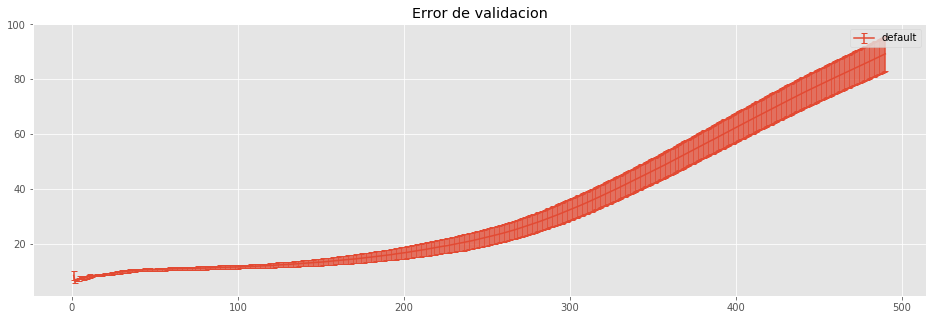

In [91]:
# separamos los pesos basados en cada 
cv_results_uniform = cv_results

plt.figure(figsize=(16, 5))  # Puedes cambiar estos valores según tus necesidades
# eje x xantidad de vecinos y en el y cuanto es el errror
plt.title("Error de validacion")
plt.errorbar(cv_results_energy['param_n_neighbors'],cv_results_energy['destandardized_mean_test_score'],
             cv_results_energy['destandardized_std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [92]:
cv_results_best = cv_results_energy[cv_results_energy['rank_test_score'] == 1]
cv_results_best.loc[:, colums_selected]

param_n_neighbors  mean_test_score  std_test_score  \
1                 2        -0.068437        0.006468   

   destandardized_mean_test_score  destandardized_std_test_score  \
1                        6.115758                       0.577994   

   rank_test_score  
1                1

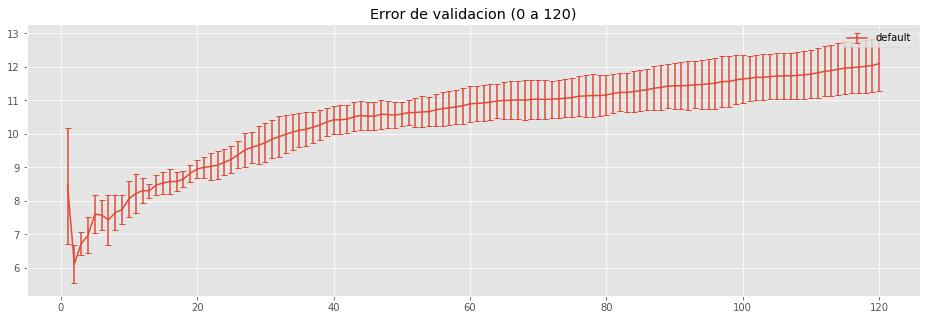

In [93]:
# Primera gráfica: De 0 a 110
plt.figure(figsize=(16, 5))
plt.title("Error de validacion (0 a 120)")
subset = cv_results_energy[cv_results_energy['param_n_neighbors'] <= 120]
plt.errorbar(subset['param_n_neighbors'],subset['destandardized_mean_test_score'],
             subset['destandardized_std_test_score'], label='default', capsize=3)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [94]:
cv_results_best = cv_results_energy
cv_results_best.loc[:,colums_selected].sort_values(by='rank_test_score').head()

param_n_neighbors  mean_test_score  std_test_score  \
1                 2        -0.068437        0.006468   
2                 3        -0.075310        0.003948   
3                 4        -0.078032        0.006058   
6                 7        -0.083188        0.008483   
5                 6        -0.084838        0.005166   

   destandardized_mean_test_score  destandardized_std_test_score  \
1                        6.115758                       0.577994   
2                        6.729977                       0.352763   
3                        6.973186                       0.541388   
6                        7.433922                       0.758080   
5                        7.581354                       0.461651   

   rank_test_score  
1                1  
2                2  
3                3  
6                4  
5                5

In [95]:
# Aplicar la regla de una desviación estándar
best_model = cv_results_energy[cv_results_energy['rank_test_score'] == 1].sort_values(by='param_n_neighbors').iloc[0]
mejor_score = best_model['destandardized_mean_test_score']
mejor_std = best_model['destandardized_std_test_score']

threshold_energy=mejor_score+mejor_std
print(threshold_energy)
cv_results_aux = cv_results_energy[
     cv_results_energy['destandardized_mean_test_score']<=threshold_energy
].sort_values(by='param_n_neighbors', ascending=False)

cv_results_aux = cv_results_aux.loc[:, colums_selected]

cv_results_aux = cv_results_aux.sort_values(by='param_n_neighbors')
cv_results_aux


6.693751955325673


param_n_neighbors  mean_test_score  std_test_score  \
1                 2        -0.068437        0.006468   

   destandardized_mean_test_score  destandardized_std_test_score  \
1                        6.115758                       0.577994   

   rank_test_score  
1                1

En este caso se el valor que se obtiene como el mejor y el que da el la regla de una desviación estándar seria la misma cantidad de neighbors


In [104]:
# Hacemos un Grid Search sin Cross Validation, únicamente con entrenamieto y validación (PredefinedSplit)

# Creamos una lista con `-1` para los índices de entrenamiento y `0` para los índices de validación
split_test_fold = [-1]*len(dataset_train_Y_energy) + [0]*len(dataset_test_Y_energy)
ps = PredefinedSplit(test_fold=split_test_fold)

# Juntamos los conjuntos de entrenamiento y test, fingiendo que son un sólo conjunto de entrenamiento-validación
dataset_all_X_scaled = np.vstack([dataset_train_X_energy, dataset_test_X_energy])
dataset_all_Y = pd.concat([dataset_train_Y_energy, dataset_test_Y_energy])

k_neigh = KNeighborsRegressor()
modelCV_test_energy = GridSearchCV(k_neigh,
                       hyperparameters,
                       cv=ps,
                       scoring='neg_mean_squared_error',
                       return_train_score=True)

np.random.seed(SEED_VALUE)  # Por como funciona KNN, no haría falta establecer semilla. Pero lo ponemos igualmente
modelCV_test_energy.fit(dataset_all_X_scaled, dataset_all_Y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...74, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [105]:
test_results_energy = pd.DataFrame(modelCV_test_energy.cv_results_)
test_results_energy['destandardized_mean_test_score'] = (-1) * test_results_energy['mean_test_score'] * (scaler.scale_[8]**2)
test_results_energy['destandardized_std_test_score'] = test_results_energy['std_test_score'] * (scaler.scale_[8]**2)
test_results_energy.loc[:, colums_selected]

param_n_neighbors  mean_test_score  std_test_score  \
0                   1        -0.174802             0.0   
1                   2        -0.140871             0.0   
2                   3        -0.111449             0.0   
3                   4        -0.125582             0.0   
4                   5        -0.129534             0.0   
5                   6        -0.118376             0.0   
6                   7        -0.108821             0.0   
7                   8        -0.107991             0.0   
8                   9        -0.107463             0.0   
9                  10        -0.109666             0.0   
10                 11        -0.112116             0.0   
11                 12        -0.112758             0.0   
12                 13        -0.110855             0.0   
13                 14        -0.115217             0.0   
14                 15        -0.117240             0.0   
15                 16        -0.119854             0.0   
16                 17        -0.122349             0.0   
17                 18        -0.126318             0.0   
18                 19        -0.128222             0.0   
19                 20        -0.131418             0.0   
20                 21        -0.131809             0.0   
21                 22        -0.134821             0.0   
22                 23        -0.133134             0.0   
23                 24        -0.133741             0.0   
24                 25        -0.133499             0.0   
25                 26        -0.134914             0.0   
26                 27        -0.135358             0.0   
27                 28        -0.138215             0.0   
28                 29        -0.139742             0.0   
29                 30        -0.141157             0.0   
..                ...              ...             ...   
460               461        -0.644159             0.0   
461               462        -0.647032             0.0   
462               463        -0.650022             0.0   
463               464        -0.652950             0.0   
464               465        -0.655996             0.0   
465               466        -0.658553             0.0   
466               467        -0.660816             0.0   
467               468        -0.663595             0.0   
468               469        -0.666416             0.0   
469               470        -0.669424             0.0   
470               471        -0.672328             0.0   
471               472        -0.674924             0.0   
472               473        -0.677762             0.0   
473               474        -0.680650             0.0   
474               475        -0.683226             0.0   
475               476        -0.686031             0.0   
476               477        -0.688784             0.0   
477               478        -0.692055             0.0   
478               479        -0.695224             0.0   
479               480        -0.698292             0.0   
480               481        -0.701042             0.0   
481               482        -0.703916             0.0   
482               483        -0.706581             0.0   
483               484        -0.709309             0.0   
484               485        -0.712448             0.0   
485               486        -0.715400             0.0   
486               487        -0.718520             0.0   
487               488        -0.721187             0.0   
488               489        -0.723769             0.0   
489               490        -0.726525             0.0   

     destandardized_mean_test_score  destandardized_std_test_score  \
0                         15.620854                            0.0   
1                         12.588656                            0.0   
2                          9.959396                            0.0   
3                         11.222376                            0.0   
4                         11.575521                      

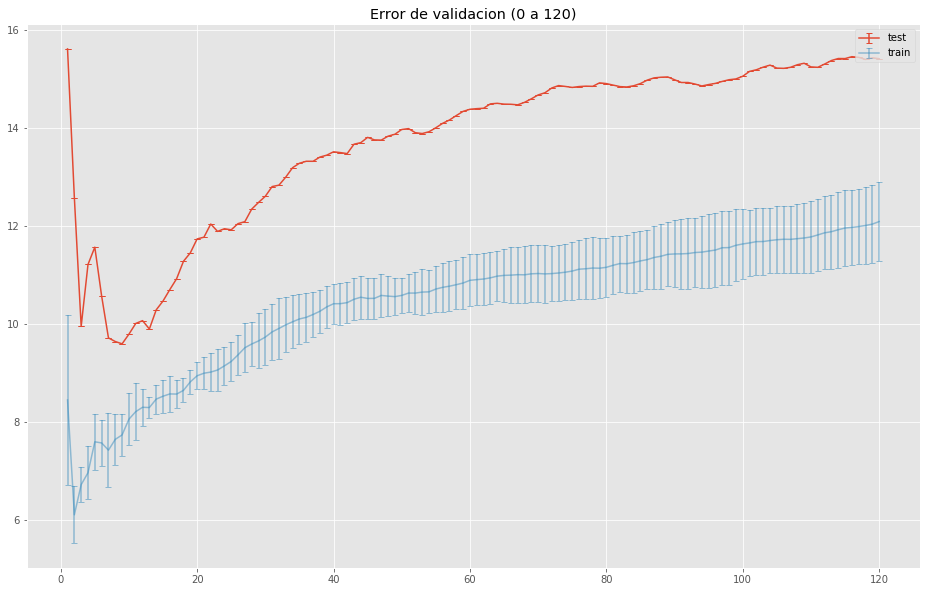

In [106]:
plt.figure(figsize=(16, 10))
plt.title("Error de validacion (0 a 120)")
subset = cv_results_energy[cv_results_energy['param_n_neighbors'] <= 120]
subset_test= test_results_energy[test_results_energy['param_n_neighbors']<= 120]
plt.errorbar(subset_test['param_n_neighbors'],subset_test['destandardized_mean_test_score'],
             subset_test['destandardized_std_test_score'], label='test', capsize=3)  # 1 - [] para imprimir el error

plt.errorbar(subset['param_n_neighbors'],subset['destandardized_mean_test_score'],
             subset['destandardized_std_test_score'], label='train', capsize=3,alpha=0.5)  # 1 - [] para imprimir el error
plt.legend(loc='upper right')
plt.show()

In [107]:
test_results_energy.loc[:, colums_selected].sort_values(by='destandardized_mean_test_score').head()

param_n_neighbors  mean_test_score  std_test_score  \
8                  9        -0.107463             0.0   
7                  8        -0.107991             0.0   
6                  7        -0.108821             0.0   
9                 10        -0.109666             0.0   
12                13        -0.110855             0.0   

    destandardized_mean_test_score  destandardized_std_test_score  \
8                         9.603207                            0.0   
7                         9.650452                            0.0   
6                         9.724561                            0.0   
9                         9.800067                            0.0   
12                        9.906309                            0.0   

    rank_test_score  
8                 1  
7                 2  
6                 3  
9                 4  
12                5

In [108]:
test_results_energy.loc[1:1, colums_selected].sort_values(by='destandardized_mean_test_score').head()

param_n_neighbors  mean_test_score  std_test_score  \
1                 2        -0.140871             0.0   

   destandardized_mean_test_score  destandardized_std_test_score  \
1                       12.588656                            0.0   

   rank_test_score  
1               28

En este caso el valor que selencionamos bastante diferencia con el modelo que mejores valores obtenido en el test 